In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns
import numpy as np

In [14]:
PR_matrix = pd.read_csv('Precision_Recall_across_iterations.csv', header=None, index_col=0, delimiter=';')
PR_matrix

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,,,,,,,,,,,,,,,,,,,,
RF_SG_msi_P,0.928571,0.750000,0.882353,0.772727,0.933333,0.937500,0.888889,0.882353,0.882353,0.888889,0.894737,0.842105,0.761905,0.833333,0.823529,0.833333,0.833333,0.850000,0.842105,0.894737
RF_SG_msi_R,0.764706,0.882353,0.882353,1.000000,0.823529,0.882353,0.941176,0.882353,0.882353,0.941176,1.000000,0.941176,0.941176,0.882353,0.823529,0.882353,0.882353,1.000000,0.941176,1.000000
XGB_SG_msi_P,0.933333,0.700000,0.882353,0.772727,0.928571,0.944444,0.941176,0.875000,0.833333,0.888889,0.894737,0.888889,0.800000,0.833333,0.722222,0.875000,0.842105,0.842105,0.888889,0.894737
XGB_SG_msi_R,0.823529,0.823529,0.882353,1.000000,0.764706,1.000000,0.941176,0.823529,0.882353,0.941176,1.000000,0.941176,0.941176,0.882353,0.764706,0.823529,0.941176,0.941176,0.941176,1.000000
RF_SG_stage_P,0.722222,0.529412,0.666667,0.615385,0.692308,0.650000,0.625000,0.833333,0.800000,0.733333,0.625000,0.705882,0.666667,0.846154,0.812500,0.647059,0.750000,0.714286,0.600000,0.625000
RF_SG_stage_R,1.000000,0.642857,0.769231,0.615385,0.692308,0.928571,0.769231,0.714286,0.857143,0.846154,0.714286,0.857143,0.857143,0.846154,0.928571,0.846154,0.642857,0.714286,0.692308,0.714286
XGB_SG_stage_P,0.647059,0.500000,0.692308,0.818182,0.666667,0.611111,0.769231,0.800000,0.857143,0.833333,0.600000,0.666667,0.750000,0.833333,0.733333,0.625000,0.666667,0.727273,0.642857,0.750000
XGB_SG_stage_R,0.846154,0.571429,0.692308,0.692308,0.615385,0.785714,0.769231,0.857143,0.857143,0.769231,0.642857,0.571429,0.857143,0.769231,0.785714,0.769231,0.571429,0.571429,0.692308,0.642857
RF_SG_TL_P,0.867262,0.841518,0.895833,0.948661,0.878472,0.781597,0.851935,0.799851,0.880952,0.822321,0.888393,0.863393,0.897073,0.844643,0.789435,0.825893,0.842262,0.836310,0.807720,0.772768


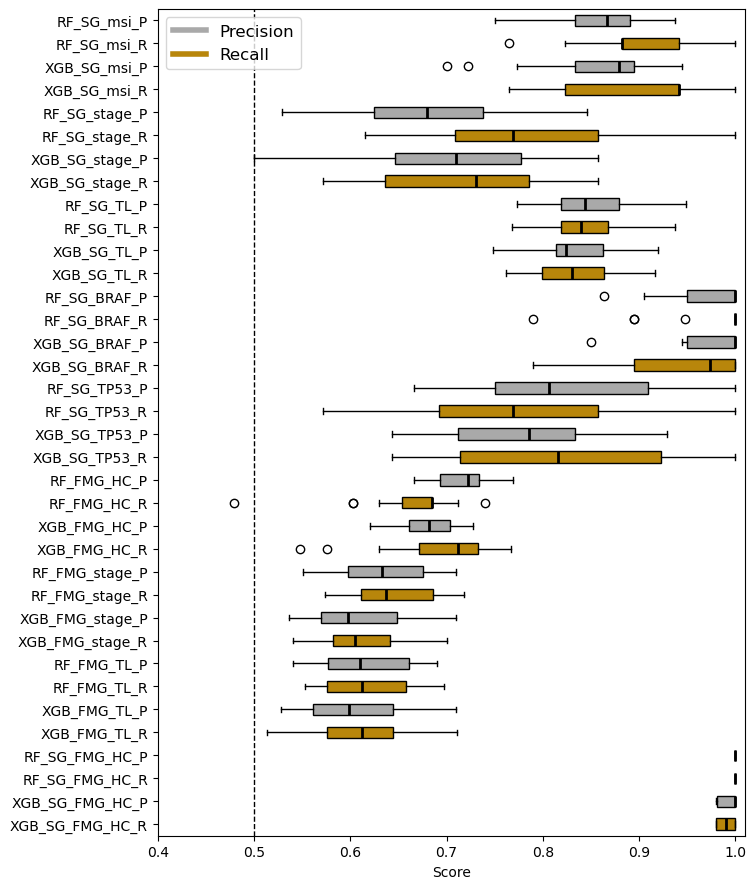

             Label  Median Value
0      RF_SG_msi_P      0.866176
1      RF_SG_msi_R      0.882353
2     XGB_SG_msi_P      0.878676
3     XGB_SG_msi_R      0.941176
4    RF_SG_stage_P      0.679487
5    RF_SG_stage_R      0.769231
6   XGB_SG_stage_P      0.709790
7   XGB_SG_stage_R      0.730769
8       RF_SG_TL_P      0.843452
9       RF_SG_TL_R      0.839286
10     XGB_SG_TL_P      0.824058
11     XGB_SG_TL_R      0.830357
12    RF_SG_BRAF_P      1.000000
13    RF_SG_BRAF_R      1.000000
14   XGB_SG_BRAF_P      1.000000
15   XGB_SG_BRAF_R      0.973684
16    RF_SG_TP53_P      0.806250
17    RF_SG_TP53_R      0.769231
              Label  Median Value
18    XGB_SG_TP53_P      0.785714
19    XGB_SG_TP53_R      0.815934
20      RF_FMG_HC_P      0.722194
21      RF_FMG_HC_R      0.684932
22     XGB_FMG_HC_P      0.682105
23     XGB_FMG_HC_R      0.712329
24   RF_FMG_stage_P      0.633085
25   RF_FMG_stage_R      0.636957
26  XGB_FMG_stage_P      0.597166
27  XGB_FMG_stage_R      0.605138

In [15]:
df = PR_matrix.transpose()

P_color = 'darkgrey' 
R_color = 'darkgoldenrod'
median_color = 'black'
median_linewidth = 2
label_fontsize = 10
legend_fontsize = 12

fig, ax = plt.subplots(figsize=(9, 9)) 

bp = ax.boxplot(df.values, vert=False, patch_artist=True)

median_values = []

# Color the boxplots and extract median values
for i, (patch, median) in enumerate(zip(bp['boxes'], bp['medians'])):
    label = PR_matrix.index[i]
    if label.lower().endswith('_r'):
        patch.set_facecolor(R_color)
    elif label.lower().endswith('_p'):
        patch.set_facecolor(P_color)

    median.set_color(median_color)
    median.set_linewidth(median_linewidth)
    median_value = median.get_xdata()[1]  
    median_values.append(median_value)
    
ax.axvline(x=0.5, color='black', linestyle='--', linewidth=1)
ax.set_yticklabels(PR_matrix.index, fontsize=label_fontsize)
ax.set_xlim(0.4, 1.01)
ax.set_xlabel('Score', fontsize=label_fontsize)
ax.invert_yaxis()

handles = [plt.Line2D([0], [0], color=P_color, lw=4),
           plt.Line2D([0], [0], color=R_color, lw=4)]
labels = ['Precision', 'Recall']

legend = ax.legend(handles, labels, loc='upper left',fontsize=legend_fontsize)

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

median_df = pd.DataFrame({
    'Label': PR_matrix.index,
    'Median Value': median_values
})

pd.set_option('display.max_rows', None)

print(median_df[0:18])
print(median_df[18:36]) # can be up to 36 here as we had 18 models

In [16]:
for i, j in zip(range(0, 35, 2), range(1, 36, 2)):
    one_row = PR_matrix.iloc[i]
    other_row = PR_matrix.iloc[j]
    
    # Calculate t-test
    t, p = ttest_ind(one_row, other_row)
    
    # Print the result
    print(f"Rows {i} vs {j} - P-value: {p:.3e}")

Rows 0 vs 1 - P-value: 9.999e-03
Rows 2 vs 3 - P-value: 6.362e-02
Rows 4 vs 5 - P-value: 5.897e-03
Rows 6 vs 7 - P-value: 8.245e-01
Rows 8 vs 9 - P-value: 6.721e-01
Rows 10 vs 11 - P-value: 8.160e-01
Rows 12 vs 13 - P-value: 8.489e-01
Rows 14 vs 15 - P-value: 1.733e-01
Rows 16 vs 17 - P-value: 1.131e-01
Rows 18 vs 19 - P-value: 1.945e-01
Rows 20 vs 21 - P-value: 4.664e-04
Rows 22 vs 23 - P-value: 2.355e-01
Rows 24 vs 25 - P-value: 5.492e-01
Rows 26 vs 27 - P-value: 8.123e-01
Rows 28 vs 29 - P-value: 9.634e-01
Rows 30 vs 31 - P-value: 8.067e-01
Rows 32 vs 33 - P-value: nan
Rows 34 vs 35 - P-value: 3.324e-01


c:\Anaconda\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [17]:
F1score_matrix = pd.read_csv('F1score_across_iterations.csv', header=None, index_col=0, delimiter=';')
F1score_matrix

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,,,,,,,,,,,,,,,,,,,,
RF_SG_msi,0.838710,0.810811,0.882353,0.871795,0.875000,0.909091,0.914286,0.882353,0.882353,0.914286,0.944444,0.888889,0.842105,0.857143,0.823529,0.857143,0.857143,0.918919,0.888889,0.944444
XGB_SG_msi,0.875000,0.756757,0.882353,0.871795,0.838710,0.971429,0.941176,0.848485,0.857143,0.914286,0.944444,0.914286,0.864865,0.857143,0.742857,0.848485,0.888889,0.888889,0.914286,0.944444
RF_SG_stage,0.838710,0.580645,0.714286,0.615385,0.692308,0.764706,0.689655,0.769231,0.827586,0.785714,0.666667,0.774194,0.750000,0.846154,0.866667,0.733333,0.692308,0.714286,0.642857,0.666667
XGB_SG_stage,0.733333,0.533333,0.692308,0.750000,0.640000,0.687500,0.769231,0.827586,0.857143,0.800000,0.620690,0.615385,0.800000,0.800000,0.758621,0.689655,0.615385,0.640000,0.666667,0.692308
RF_SG_TL,0.849590,0.822561,0.873810,0.936072,0.851366,0.774468,0.831668,0.805754,0.862238,0.826007,0.879720,0.858079,0.880383,0.832809,0.757647,0.803761,0.833761,0.832647,0.779247,0.751537
XGB_SG_TL,0.892657,0.868627,0.810632,0.912354,0.848905,0.821474,0.775198,0.833389,0.801799,0.814560,0.767170,0.801099,0.880871,0.849242,0.758109,0.863004,0.833783,0.811538,0.750156,0.755195
RF_SG_BRAF,0.944444,0.950000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.974359,0.882353,1.000000,1.000000,0.926829,0.944444,0.974359,0.974359,0.972973,0.974359,0.974359,0.974359
XGB_SG_BRAF,0.882353,0.974359,1.000000,0.972973,0.972973,1.000000,1.000000,1.000000,0.918919,0.944444,1.000000,1.000000,0.871795,0.944444,0.974359,0.974359,0.944444,0.947368,0.947368,0.974359
RF_SG_TP53,0.782609,0.740741,0.857143,0.695652,0.720000,0.866667,0.833333,0.814815,0.848485,0.857143,0.769231,0.774194,0.750000,0.833333,0.800000,0.720000,0.727273,0.733333,0.818182,0.880000


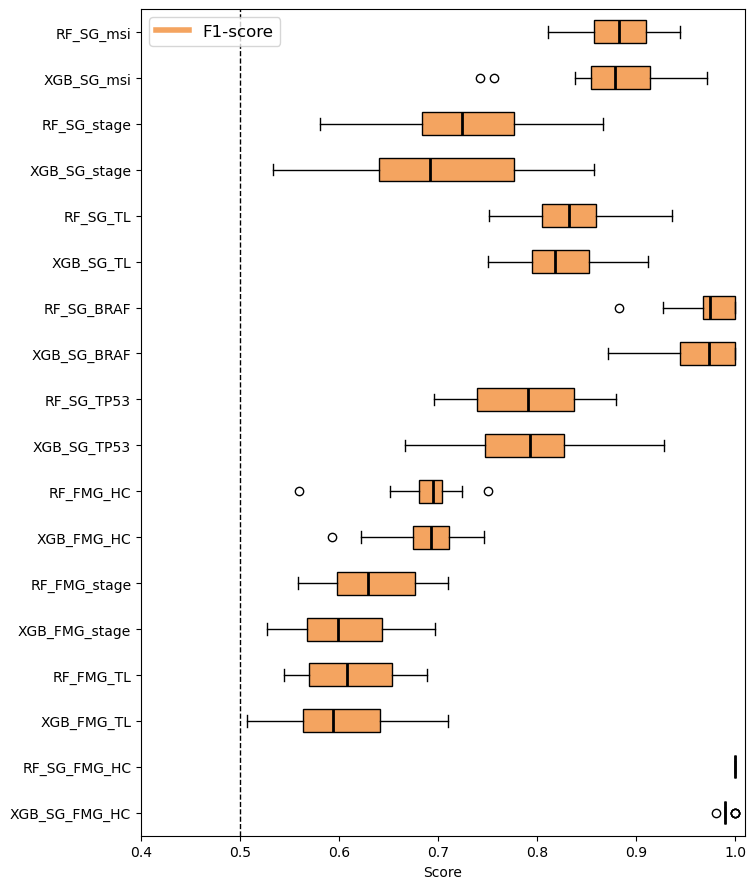

            Label  Median Value
0       RF_SG_msi      0.882353
1      XGB_SG_msi      0.878676
2     RF_SG_stage      0.723810
3    XGB_SG_stage      0.692308
4        RF_SG_TL      0.832728
5       XGB_SG_TL      0.818017
6      RF_SG_BRAF      0.974359
7     XGB_SG_BRAF      0.973666
8      RF_SG_TP53      0.791304
9     XGB_SG_TP53      0.792857
10      RF_FMG_HC      0.694639
11     XGB_FMG_HC      0.692810
12   RF_FMG_stage      0.629668
13  XGB_FMG_stage      0.598570
14      RF_FMG_TL      0.608423
15     XGB_FMG_TL      0.594180
16   RF_SG_FMG_HC      1.000000
17  XGB_SG_FMG_HC      0.990099


In [18]:
df1 = F1score_matrix.transpose()

box_color = 'sandybrown'
median_color = 'black'
median_linewidth = 2
label_fontsize = 10
legend_fontsize = 12

fig, ax = plt.subplots(figsize=(9, 9)) 

bp = ax.boxplot(df1.values, vert=False, patch_artist=True)

median_values=[]

for box in bp['boxes']:
    box.set_facecolor(box_color)

for median in bp['medians']:
    median.set_color(median_color)
    median.set_linewidth(median_linewidth)
    median_value = median.get_xdata()[1]  
    median_values.append(median_value)

ax.axvline(x=0.5, color='black', linestyle='--', linewidth=1)
ax.set_yticklabels(F1score_matrix.index, fontsize=label_fontsize)
ax.set_xlim(0.4, 1.01)
ax.set_xlabel('Score', fontsize=label_fontsize)
ax.invert_yaxis()

handles = [plt.Line2D([0], [0], color=box_color, lw=4)]
labels = ['F1-score']
legend = ax.legend(handles, labels, loc='upper left', fontsize=legend_fontsize)

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

median_df = pd.DataFrame({
    'Label': F1score_matrix.index,
    'Median Value': median_values
})

pd.set_option('display.max_rows', None)

print(median_df)

In [19]:
for i, j in zip(range(0, 18, 2), range(1, 19, 2)):
    one_row = F1score_matrix.iloc[i]
    other_row = F1score_matrix.iloc[j]
    
    # Calculate t-test
    t, p = ttest_ind(one_row, other_row)
    
    # Print the result
    print(f"Rows {i} vs {j} - P-value: {p:.3e}")

Rows 0 vs 1 - P-value: 9.020e-01
Rows 2 vs 3 - P-value: 3.994e-01
Rows 4 vs 5 - P-value: 5.130e-01
Rows 6 vs 7 - P-value: 3.156e-01
Rows 8 vs 9 - P-value: 8.710e-01
Rows 10 vs 11 - P-value: 9.292e-01
Rows 12 vs 13 - P-value: 5.341e-02
Rows 14 vs 15 - P-value: 4.622e-01
Rows 16 vs 17 - P-value: 2.067e-09


c:\Anaconda\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
